In [1]:
# !pip install numpy matplotlib pandas tqdm

In [1]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open("metrics_cuda.json", encoding="utf-8") as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)
# df["size"] = df["count"] * df["block_size"]
df.sort_values("duration", ascending=False)

,size,duration,value,block_size,grid_size,runtime,device
0,10000000,0.523555,0.0,1,1,CUDA Reduction,TODO
11,10000000,0.422370,0.0,1,2,CUDA Reduction,TODO
1,10000000,0.378713,0.0,2,1,CUDA Reduction,TODO
22,10000000,0.305851,0.0,1,4,CUDA Reduction,TODO
2,10000000,0.286935,0.0,4,1,CUDA Reduction,TODO
...,...,...,...,...,...,...,...
39,10000000,0.109933,0.0,64,8,CUDA Reduction,TODO
92,10000000,0.109899,0.0,16,256,CUDA Reduction,TODO
119,10000000,0.109830,0.0,512,1024,CUDA Reduction,TODO
114,10000000,0.109582,0.0,16,1024,CUDA Reduction,TODO


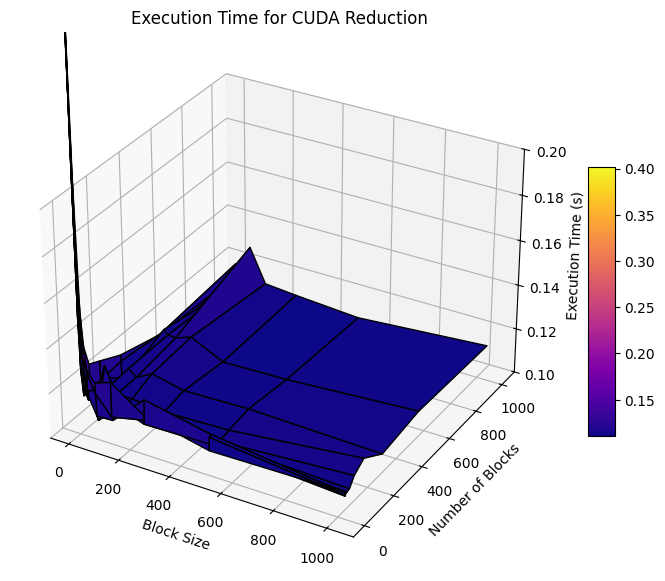

In [ ]:
runtimes = df["runtime"].unique()

for target_runtime in runtimes: 
    # target_runtime = 'OpenCL Reduction'
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['grid_size'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['grid_size'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')

    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    # ax.set_zbound(0.1, 0.2)
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
